# Leverage points

Model with Mansions:
Intercept: -225040.03
House Size Coefficient: 114.5881



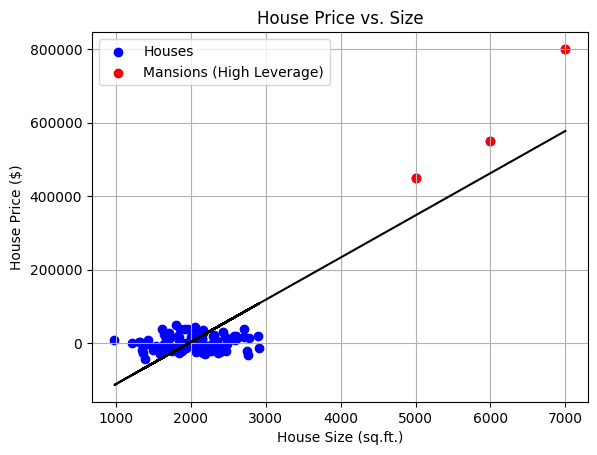

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate synthetic data
np.random.seed(0)
house_size = np.random.normal(2000, 400, 100)  # average house around 2000 sq.ft.
house_price = 100 + 0.5 * house_size + np.random.normal(0, 20000, 100)

# Add a few mansions
house_size = np.append(house_size, [5000, 6000, 7000])
house_price = np.append(house_price, [450000, 550000, 800000])  # not necessarily following the previous linear trend

# Fit a linear regression model
X = sm.add_constant(house_size)
model = sm.OLS(house_price, X).fit()

# Printing parameters for the model with mansions
print("Model with Mansions:")
print(f"Intercept: {model.params[0]:.2f}")
print(f"House Size Coefficient: {model.params[1]:.4f}\n")

# Plot the data and the regression line
plt.scatter(house_size, house_price, color='blue', label='Houses')
plt.scatter(house_size[-3:], house_price[-3:], color='red', label='Mansions (High Leverage)')
plt.plot(house_size, model.params[0] + model.params[1] * house_size, color='black')
plt.title('House Price vs. Size')
plt.xlabel('House Size (sq.ft.)')
plt.ylabel('House Price ($)')
plt.legend()
plt.grid(True)
plt.show()


Model without Mansions:
Intercept: -9866.78
House Size Coefficient: 6.2349


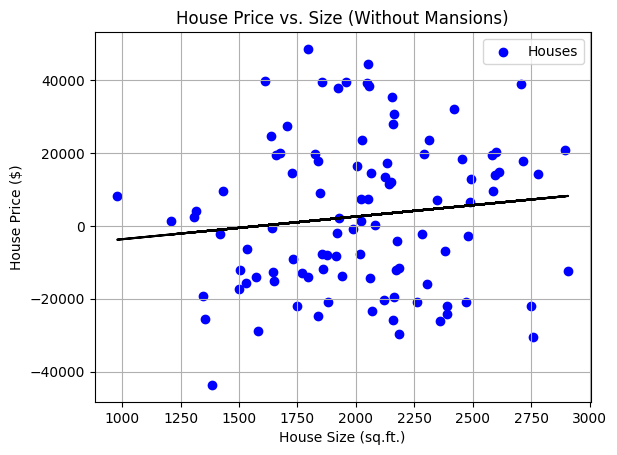

In [3]:
# Generate synthetic data (without the mansions)
np.random.seed(0)
house_size = np.random.normal(2000, 400, 100)  # average house around 2000 sq.ft.
house_price = 100 + 0.5 * house_size + np.random.normal(0, 20000, 100)

# Fit a linear regression model
X = sm.add_constant(house_size)
model_without_mansions = sm.OLS(house_price, X).fit()

# Printing parameters for the model without mansions
print("Model without Mansions:")
print(f"Intercept: {model_without_mansions.params[0]:.2f}")
print(f"House Size Coefficient: {model_without_mansions.params[1]:.4f}")

# Plot the data and the regression line
plt.scatter(house_size, house_price, color='blue', label='Houses')
plt.plot(house_size, model_without_mansions.params[0] + model_without_mansions.params[1] * house_size, color='black')
plt.title('House Price vs. Size (Without Mansions)')
plt.xlabel('House Size (sq.ft.)')
plt.ylabel('House Price ($)')
plt.legend()
plt.grid(True)
plt.show()


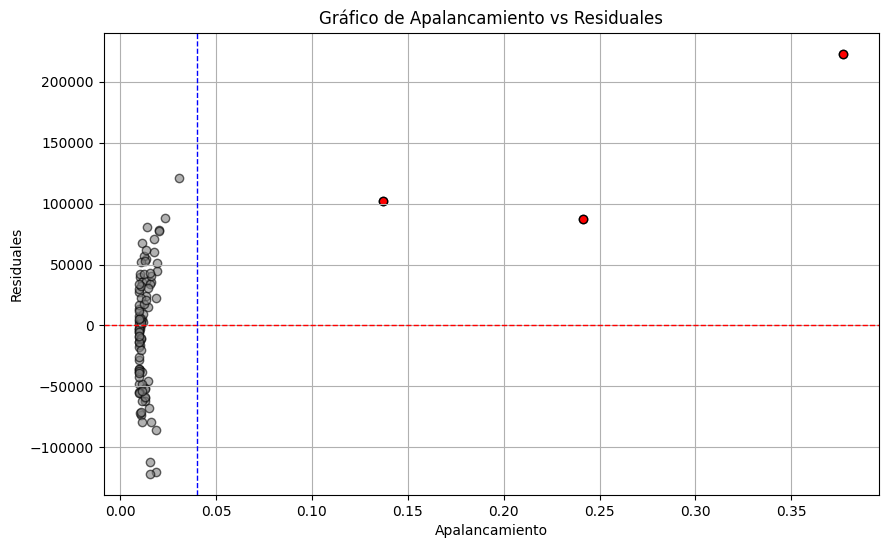

Observaciones con alto apalancamiento: [100 101 102]
Valores de apalancamiento: [0.13694378 0.24146323 0.37708716]


In [4]:
# Obtener valores de apalancamiento (diagonal de la matriz H) y residuales
influence = model.get_influence()
leverage = influence.hat_matrix_diag
residuals = model.resid

# Calcular el umbral para puntos de apalancamiento alto
n = len(house_price)
p = X.shape[1]  # número de predictores + intercepto
threshold = 2 * p / n

# Gráfico de apalancamiento vs residuales
plt.figure(figsize=(10, 6))
plt.scatter(leverage, residuals, edgecolor='k', facecolor='gray', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.axvline(threshold, color='blue', linestyle='--', linewidth=1)
plt.xlabel('Apalancamiento')
plt.ylabel('Residuales')
plt.title('Gráfico de Apalancamiento vs Residuales')
plt.grid(True)

# Resaltar puntos con alto apalancamiento (mansiones)
high_leverage_points = np.where(leverage > threshold)[0]
plt.scatter(leverage[high_leverage_points], residuals[high_leverage_points], edgecolor='k', facecolor='red')

plt.show()

# Imprimir puntos con alto apalancamiento
print(f"Observaciones con alto apalancamiento: {high_leverage_points}")
print(f"Valores de apalancamiento: {leverage[high_leverage_points]}")

# Exercise 1

Use the Boston Housing dataset, analyze it, and identify its leverage points. This dataset is available in the seaborn library.

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
Modelo de Regresión Lineal:
Intercepto: -34.67
Coeficiente de RM: 9.1021



/var/folders/6l/15nk1fyx2n1b6jll3tn0c1lr0000gn/T/ipykernel_13915/2358170475.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Intercepto: {model.params[0]:.2f}")
/var/folders/6l/15nk1fyx2n1b6jll3tn0c1lr0000gn/T/ipykernel_13915/2358170475.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Coeficiente de RM: {model.params[1]:.4f}\n")


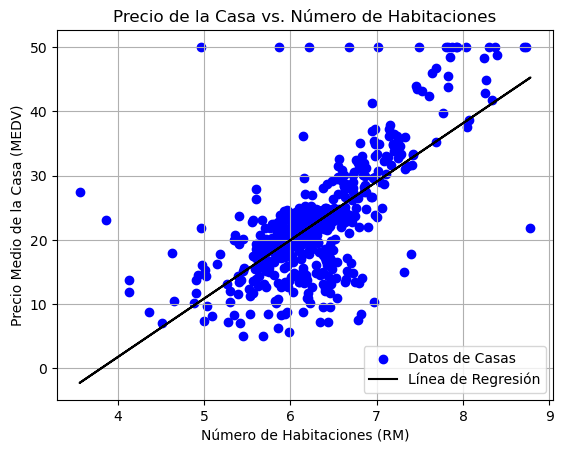

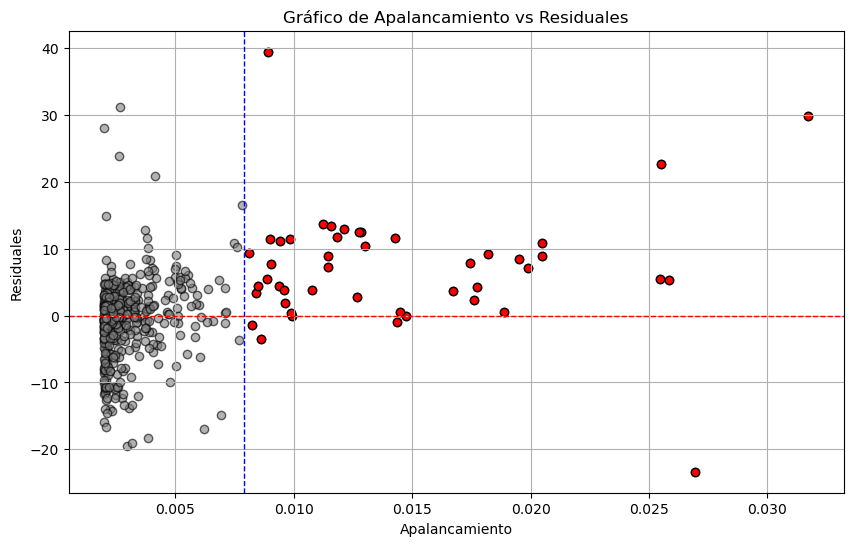

Observaciones con alto apalancamiento: [ 97  98 141 144 147 152 162 163 166 180 186 195 202 203 204 224 225 226
 228 232 233 253 257 261 262 267 273 280 282 283 310 364 365 366 367 368
 373 374 384 386 387 388 392 406 412 414]
Valores de apalancamiento: [0.01474769 0.01143201 0.0084015  0.00963326 0.00938045 0.00847277
 0.0112116  0.01950361 0.01282224 0.01076669 0.01156798 0.01212159
 0.00902228 0.01184284 0.01425159 0.01772338 0.02586435 0.01433594
 0.00985352 0.01887216 0.01742282 0.01761231 0.02545499 0.00809785
 0.01989143 0.01821998 0.00990984 0.01143201 0.00939934 0.01274324
 0.00887704 0.02695324 0.03173189 0.00898267 0.02549905 0.00890864
 0.00960005 0.02045992 0.01671127 0.01266804 0.00859586 0.00989032
 0.00823005 0.02045992 0.01298469 0.01448097]


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the Boston Housing dataset
boston = pd.read_csv('/Users/diegosanchez/Documents/universidad copy/Semestre 7/notebooks_gsus/db/boston_house_prices_1.csv')
print(boston.columns)

# Selecciona la variable independiente y la dependiente para el modelo
X = boston['RM']  # Usamos el número de habitaciones promedio (RM) como predictor
y = boston['MEDV']  # Precio medio de la casa (MEDV) como variable de respuesta

# Ajusta un modelo de regresión lineal
X = sm.add_constant(X)  # Agrega el término constante para el intercepto
model = sm.OLS(y, X).fit()

# Imprime los parámetros del modelo
print("Modelo de Regresión Lineal:")
print(f"Intercepto: {model.params[0]:.2f}")
print(f"Coeficiente de RM: {model.params[1]:.4f}\n")

# Grafica los datos y la línea de regresión
plt.scatter(boston['RM'], boston['MEDV'], color='blue', label='Datos de Casas')
plt.plot(boston['RM'], model.predict(X), color='black', label='Línea de Regresión')
plt.title('Precio de la Casa vs. Número de Habitaciones')
plt.xlabel('Número de Habitaciones (RM)')
plt.ylabel('Precio Medio de la Casa (MEDV)')
plt.legend()
plt.grid(True)
plt.show()

# Obtén valores de apalancamiento (diagonal de la matriz H) y residuales
influence = model.get_influence()
leverage = influence.hat_matrix_diag
residuals = model.resid

# Calcula el umbral para puntos de apalancamiento alto
n = len(y)
p = X.shape[1]  # número de predictores + intercepto
threshold = 2 * p / n

# Gráfico de apalancamiento vs residuales
plt.figure(figsize=(10, 6))
plt.scatter(leverage, residuals, edgecolor='k', facecolor='gray', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.axvline(threshold, color='blue', linestyle='--', linewidth=1)
plt.xlabel('Apalancamiento')
plt.ylabel('Residuales')
plt.title('Gráfico de Apalancamiento vs Residuales')
plt.grid(True)

# Resalta puntos con alto apalancamiento
high_leverage_points = np.where(leverage > threshold)[0]
plt.scatter(leverage[high_leverage_points], residuals[high_leverage_points], edgecolor='k', facecolor='red')

plt.show()

# Imprime puntos con alto apalancamiento
print(f"Observaciones con alto apalancamiento: {high_leverage_points}")
print(f"Valores de apalancamiento: {leverage[high_leverage_points]}")


# Exercise 2

Use the diamonds dataset, analyze it, and identify its leverage points. This dataset is available in the seaborn library.

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')
Modelo de Regresión Lineal:
Intercepto: -2256.36
Coeficiente de Carat: 7756.4256



/var/folders/6l/15nk1fyx2n1b6jll3tn0c1lr0000gn/T/ipykernel_13915/985763726.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Intercepto: {model.params[0]:.2f}")
/var/folders/6l/15nk1fyx2n1b6jll3tn0c1lr0000gn/T/ipykernel_13915/985763726.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Coeficiente de Carat: {model.params[1]:.4f}\n")


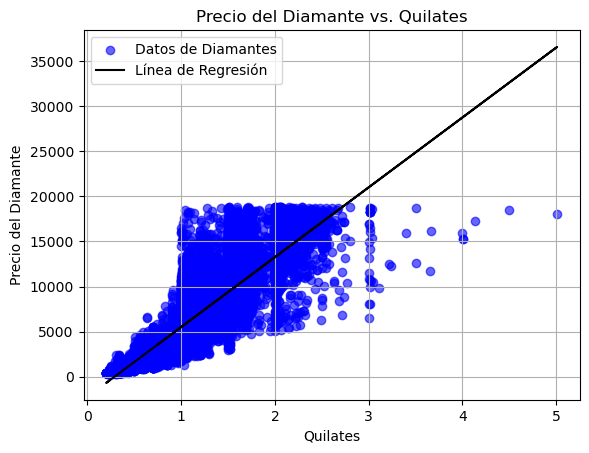

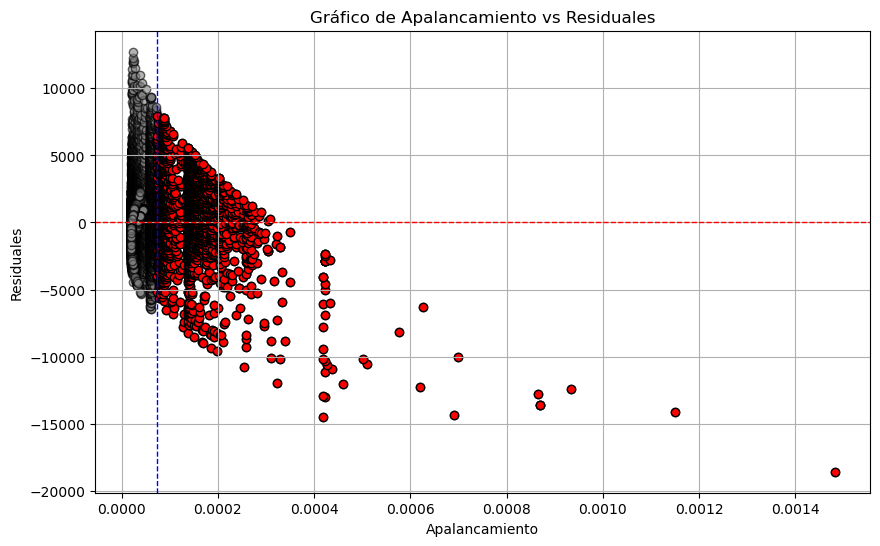

Observaciones con alto apalancamiento: [ 9851 10709 11604 ... 27746 27748 27749]
Valores de apalancamiento: [9.17671190e-05 7.70458922e-05 1.28053260e-04 ... 1.52055693e-04
 1.37765480e-04 2.02232091e-04]


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Carga el dataset de diamantes
diamonds = sns.load_dataset('diamonds')
print(diamonds.columns)

# Selecciona la variable independiente y la dependiente para el modelo
# Usamos el precio como variable dependiente y el quilate como variable independiente
X = diamonds['carat']  # Quilates
y = diamonds['price']  # Precio

# Ajusta un modelo de regresión lineal
X = sm.add_constant(X)  # Agrega el término constante para el intercepto
model = sm.OLS(y, X).fit()

# Imprime los parámetros del modelo
print("Modelo de Regresión Lineal:")
print(f"Intercepto: {model.params[0]:.2f}")
print(f"Coeficiente de Carat: {model.params[1]:.4f}\n")

# Grafica los datos y la línea de regresión
plt.scatter(diamonds['carat'], diamonds['price'], color='blue', label='Datos de Diamantes', alpha=0.6)
plt.plot(diamonds['carat'], model.predict(X), color='black', label='Línea de Regresión')
plt.title('Precio del Diamante vs. Quilates')
plt.xlabel('Quilates')
plt.ylabel('Precio del Diamante')
plt.legend()
plt.grid(True)
plt.show()

# Obtén valores de apalancamiento (diagonal de la matriz H) y residuales
influence = model.get_influence()
leverage = influence.hat_matrix_diag
residuals = model.resid

# Calcula el umbral para puntos de apalancamiento alto
n = len(y)
p = X.shape[1]  # número de predictores + intercepto
threshold = 2 * p / n

# Gráfico de apalancamiento vs residuales
plt.figure(figsize=(10, 6))
plt.scatter(leverage, residuals, edgecolor='k', facecolor='gray', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.axvline(threshold, color='blue', linestyle='--', linewidth=1)
plt.xlabel('Apalancamiento')
plt.ylabel('Residuales')
plt.title('Gráfico de Apalancamiento vs Residuales')
plt.grid(True)

# Resalta puntos con alto apalancamiento
high_leverage_points = np.where(leverage > threshold)[0]
plt.scatter(leverage[high_leverage_points], residuals[high_leverage_points], edgecolor='k', facecolor='red')

plt.show()

# Imprime puntos con alto apalancamiento
print(f"Observaciones con alto apalancamiento: {high_leverage_points}")
print(f"Valores de apalancamiento: {leverage[high_leverage_points]}")
